# Ejercicio 1 Caso Final

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


### Importación de los datos
Inicialmente se importan los datos:

In [2]:
import pandas as pd

auto = pd.read_csv('auto.csv', sep = ',')

target = 'mpg'
features = list(auto.columns)
features.remove('mpg')

# Separación de la variable objetivo y las explicativas
x = auto[features]
y = auto[target]

# Listado de variables disponibles para hacer un modelo.
for feature in features:
    print(feature , ':' , len(set(auto[feature])))

cylinders : 5
displacement : 81
horsepower : 93
weight : 346
acceleration : 95
model_year : 13
origin : 3


In [3]:
from pandas.plotting import scatter_matrix

#scatter_matrix(auto, figsize = (12, 12), diagonal = 'kde');

Vamos a estudiar los histogramas de las diferentes variables para determinar de qué tipo es cada una.

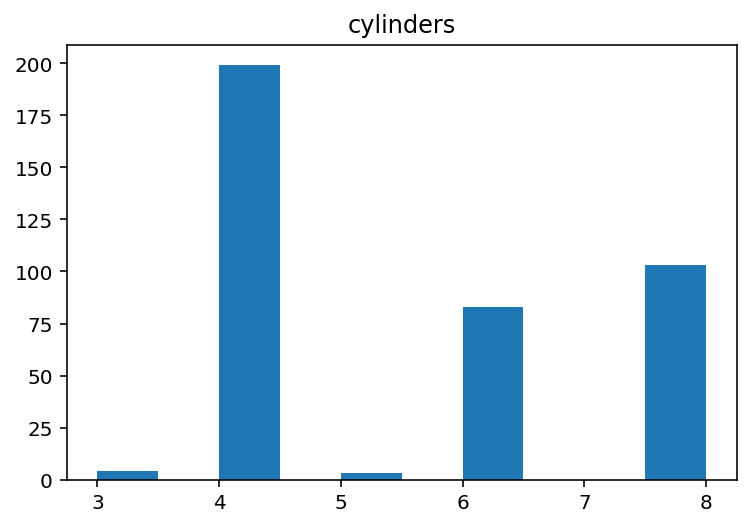

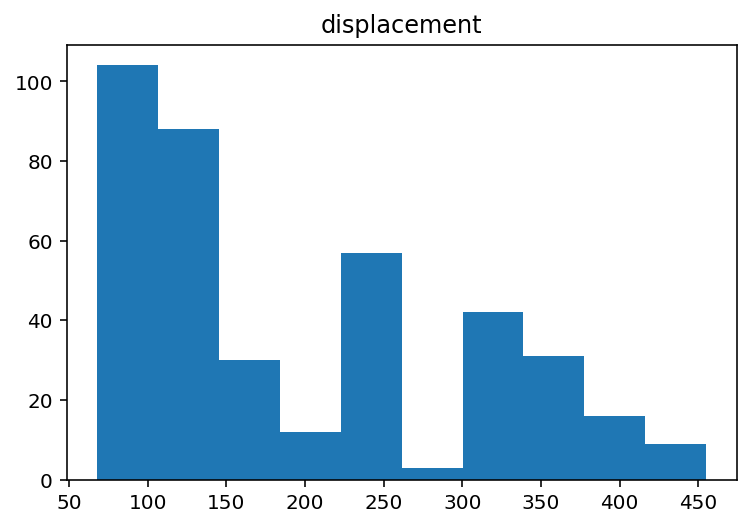

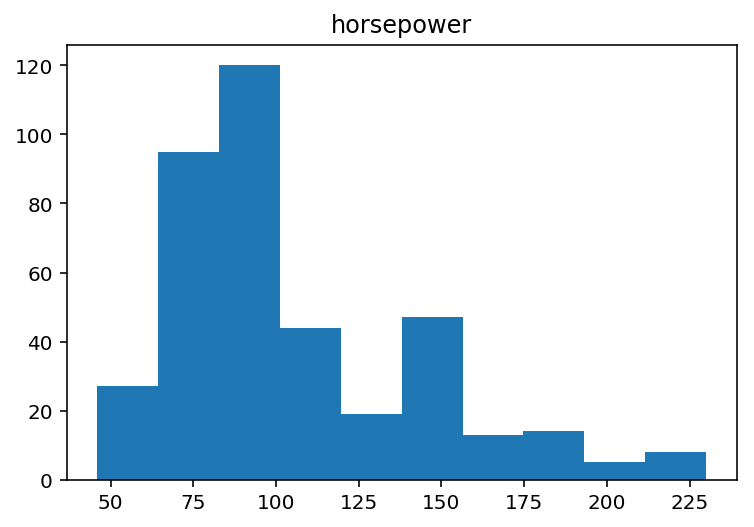

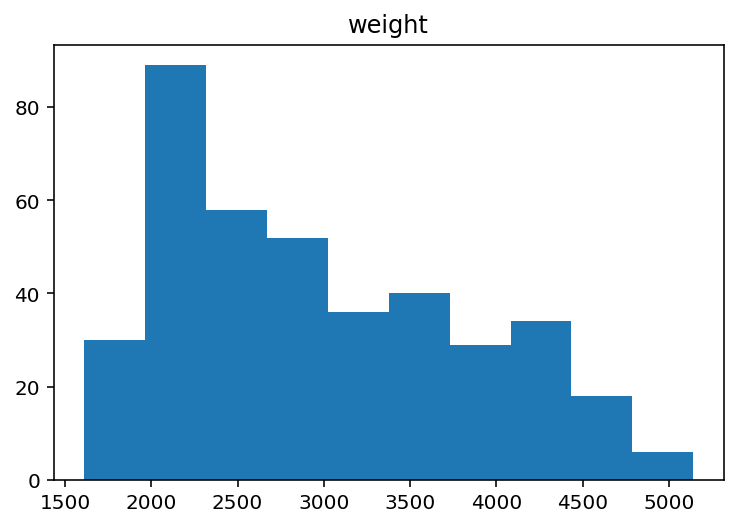

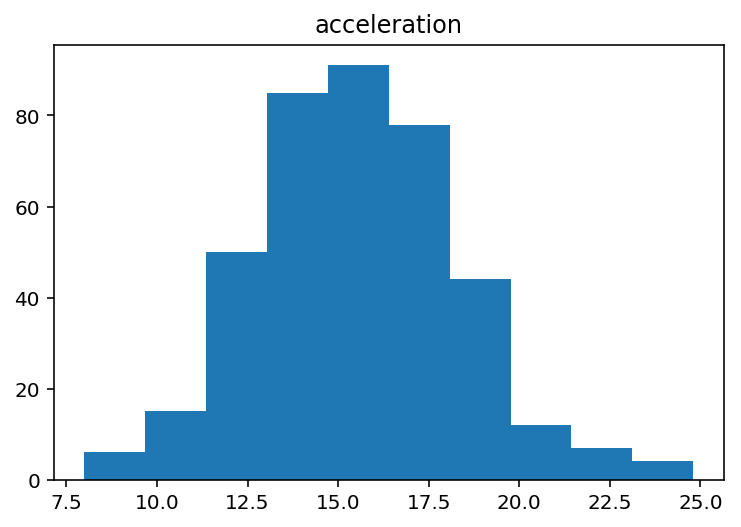

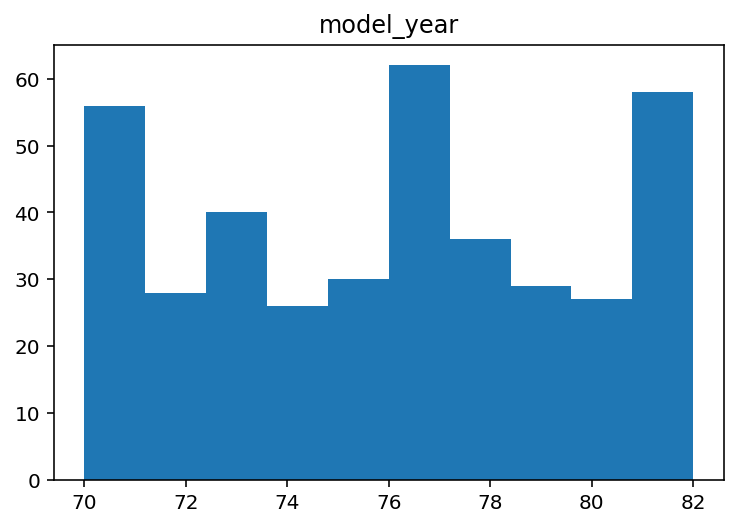

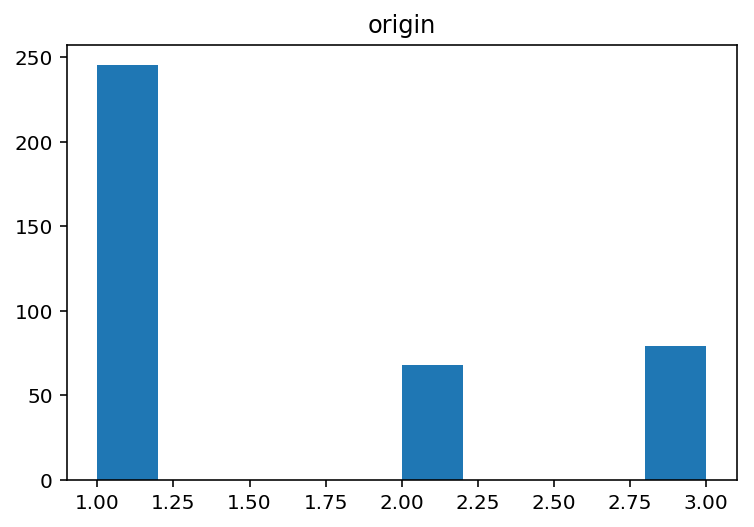

In [15]:
for var in features:
    plt.hist(auto[var])
    plt.title(var)
    plt.show()

#### Eliminación de las variables

In [4]:
#features.remove('model_year')
#features.remove('origin')

#### Análisis de las variables discretas
En las variables discretas se ha de realizar un análisis para seleccionar las que tienen mayor capacidad predictiva.

In [5]:
auto[features].head()

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504.0,12.0
1,8,350.0,165.0,3693.0,11.5
2,8,318.0,150.0,3436.0,11.0
3,8,304.0,150.0,3433.0,12.0
4,8,302.0,140.0,3449.0,10.5


In [6]:
categorical = ['cylinders'] 
continuous = ['displacement', 'horsepower', 'weight', 'acceleration']

for var in categorical:
    print("Tabla de frecuencias para:", var)
    print(pd.crosstab(auto[target], auto[var]))
    print

Tabla de frecuencias para: cylinders
cylinders  3  4  5   6   8
mpg                       
9.0        0  0  0   0   1
10.0       0  0  0   0   2
11.0       0  0  0   0   4
12.0       0  0  0   0   6
13.0       0  0  0   0  20
14.0       0  0  0   0  19
14.5       0  0  0   0   1
15.0       0  0  0   4  12
15.5       0  0  0   0   5
16.0       0  0  0   5   8
16.2       0  0  0   1   0
16.5       0  0  0   1   2
16.9       0  0  0   0   1
17.0       0  0  0   3   4
17.5       0  0  0   2   3
17.6       0  0  0   1   1
17.7       0  0  0   1   0
18.0       1  1  0  13   2
18.1       0  0  0   1   1
18.2       0  0  0   0   1
18.5       0  0  0   2   1
18.6       0  0  0   1   0
19.0       1  3  0   8   0
19.1       0  0  0   1   0
19.2       0  0  0   1   2
19.4       0  0  0   1   1
19.8       0  0  0   1   0
19.9       0  0  0   0   1
20.0       0  4  0   4   1
20.2       0  0  0   3   1
...       .. .. ..  ..  ..
34.0       0  2  0   0   0
34.1       0  2  0   0   0
34.2       0  1  0

##### Variable: `cylinders`

In [7]:
def get_WoE(data, var, target):
    crosstab = pd.crosstab(data[target], data[var])
    
    print("Obteniendo el Woe para la variable", var, ":")
    
    for col in crosstab.columns:
        if crosstab[col][1] == 0:
            print("  El WoE para", col, "[", sum(crosstab[col]), "] es infinito")
        else:
            print("  El WoE para", col, "[", sum(crosstab[col]), "] es", np.log(float(crosstab[col][0]) / float(crosstab[col][1])))

In [8]:
get_WoE(auto, 'cylinders', target)

Obteniendo el Woe para la variable cylinders :


KeyError: 1.0

##### Evaluación del IV
Analizar con IV la capacidad predictiva de las variables categóricas.

In [ ]:
from sklearn.linear_model.logistic import LogisticRegression

def calculateIV(data, features, target):
    result = pd.DataFrame(index = ['IV'], columns = features)
    result = result.fillna(0)
    var_target = array(data[target])
    
    for cat in features:
        var_values = array(data[cat])
        var_levels = unique(var_values)

        mat_values = numpy.zeros(shape=(len(var_levels),2))
        
        for i in range(len(var_target)):
            for j in range(len(var_levels)):
                if var_levels[j] == var_values[i]:
                    pos = j
                    break

            # Estimación del número valores en cada nivel
            if var_target[i]:
                mat_values[pos][0] += 1
            else:
                mat_values[pos][1] += 1

            # Obtención del IV
            IV = 0
            for j in range(len(var_levels)):
                if mat_values[j][0] > 0 and mat_values[j][1] > 0:
                    rt = mat_values[j][0] / (mat_values[j][0] + mat_values[j][1])
                    rf = mat_values[j][1] / (mat_values[j][0] + mat_values[j][1])
                    IV += (rt - rf) * np.log(rt / rf)
                    
        # Se agrega el IV al listado
        result[cat] = IV
        
    return result

calculateIV(auto, categorical, target)